In [26]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset

gfsFile = Dataset("GFSTodayReduced.nc", "r+", format="NETCDF4")

In [27]:
def p1(gfsFile):
    for name in gfsFile.ncattrs():
        print(name,"=",getattr(gfsFile,name))
        
p1(gfsFile)

tip = Nice you got the problem 1 correctly! (I hope)
history = First version
source = Global Forecast System
institution = UNAM,CCA
title = Data for my CCA class


In [28]:
def p2(gfsFile):
    netCDFvars = gfsFile.variables
    
    print("Available variables:")
    for name in netCDFvars.keys():
        print(name)
        
    return netCDFvars.keys()
    
netCDFVars = p2(gfsFile)

Available variables:
Latitude
lat_0
Longitude
lon_0
lv_ISBL0
lv_HTGL7
time
temp_surf
u_isobar
u_abvgrd
v_isobar
v_abvgrd


In [29]:
def p3(gfsFile, cVars):
    for cvar in cVars:
        theVar = gfsFile.variables[cvar]
        print("Dimensions for ",cvar,":", theVar.dimensions)
        
p3(gfsFile,netCDFVars)

Dimensions for  Latitude : ('lat_0',)
Dimensions for  lat_0 : ('lat_0',)
Dimensions for  Longitude : ('lon_0',)
Dimensions for  lon_0 : ('lon_0',)
Dimensions for  lv_ISBL0 : ('lv_ISBL0',)
Dimensions for  lv_HTGL7 : ('lv_HTGL7',)
Dimensions for  time : ('time',)
Dimensions for  temp_surf : ('time', 'lat_0', 'lon_0')
Dimensions for  u_isobar : ('time', 'lv_ISBL0', 'lat_0', 'lon_0')
Dimensions for  u_abvgrd : ('time', 'lv_HTGL7', 'lat_0', 'lon_0')
Dimensions for  v_isobar : ('time', 'lv_ISBL0', 'lat_0', 'lon_0')
Dimensions for  v_abvgrd : ('time', 'lv_HTGL7', 'lat_0', 'lon_0')


In [30]:
def p4(gfsFile, dim):
    cdim  = gfsFile.variables[dim]
    print("Values for dimension ",dim," are:")
    for idx in range(cdim.shape[0]):
        print(cdim[idx])            
p4(gfsFile,'lat_0')

Values for dimension  lat_0  are:
90.0
89.0
88.0
87.0
86.0
85.0
84.0
83.0
82.0
81.0
80.0
79.0
78.0
77.0
76.0
75.0
74.0
73.0
72.0
71.0
70.0
69.0
68.0
67.0
66.0
65.0
64.0
63.0
62.0
61.0
60.0
59.0
58.0
57.0
56.0
55.0
54.0
53.0
52.0
51.0
50.0
49.0
48.0
47.0
46.0
45.0
44.0
43.0
42.0
41.0
40.0
39.0
38.0
37.0
36.0
35.0
34.0
33.0
32.0
31.0
30.0
29.0
28.0
27.0
26.0
25.0
24.0
23.0
22.0
21.0
20.0
19.0
18.0
17.0
16.0
15.0
14.0
13.0
12.0
11.0
10.0
9.0
8.0
7.0
6.0
5.0
4.0
3.0
2.0
1.0
0.0
-1.0
-2.0
-3.0
-4.0
-5.0
-6.0
-7.0
-8.0
-9.0
-10.0
-11.0
-12.0
-13.0
-14.0
-15.0
-16.0
-17.0
-18.0
-19.0
-20.0
-21.0
-22.0
-23.0
-24.0
-25.0
-26.0
-27.0
-28.0
-29.0
-30.0
-31.0
-32.0
-33.0
-34.0
-35.0
-36.0
-37.0
-38.0
-39.0
-40.0
-41.0
-42.0
-43.0
-44.0
-45.0
-46.0
-47.0
-48.0
-49.0
-50.0
-51.0
-52.0
-53.0
-54.0
-55.0
-56.0
-57.0
-58.0
-59.0
-60.0
-61.0
-62.0
-63.0
-64.0
-65.0
-66.0
-67.0
-68.0
-69.0
-70.0
-71.0
-72.0
-73.0
-74.0
-75.0
-76.0
-77.0
-78.0
-79.0
-80.0
-81.0
-82.0
-83.0
-84.0
-85.0
-86.0
-87.0
-88.0
-8

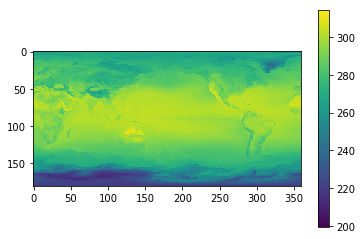

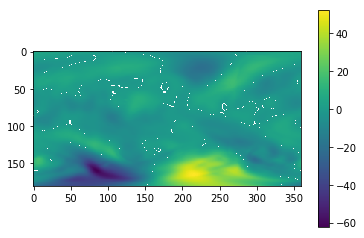

In [35]:
def p5(gfsFile,varName):
    """ This function makes a simple plot from the specified variable. The second set of 
        arguments are the specific dimensions wanted """

    myVar = gfsFile.variables.get(varName) #Reads the variable
    
    # if we receive extra arguments, then we used them to filter the data
    if len(myVar.shape)>3:
        vals = myVar[0][0]
    else:
        vals = myVar[0]
    
    # From the filtered data, we make the plot
    plt.imshow(vals[:])
    plt.colorbar()
    plt.show()
    
p5(gfsFile,'temp_surf')
p5(gfsFile,'u_isobar')

In [32]:
def p6(gfsFile,uname,vname):
    uvar = gfsFile.variables.get(uname) #Reads the variable
    vvar = gfsFile.variables.get(vname) #Reads the variable

    if len(uvar.shape)>3:
        uvals = uvar[0][0]
        vvals = vvar[0][0]
    else:
        vvals = vvar[0]
    
    mag = np.sqrt(uvals**2 + vvals**2)
    plt.imshow(mag[:])
    plt.colorbar()
    plt.show()    
    p6(gfsFile,'u_isobar','v_isobar')

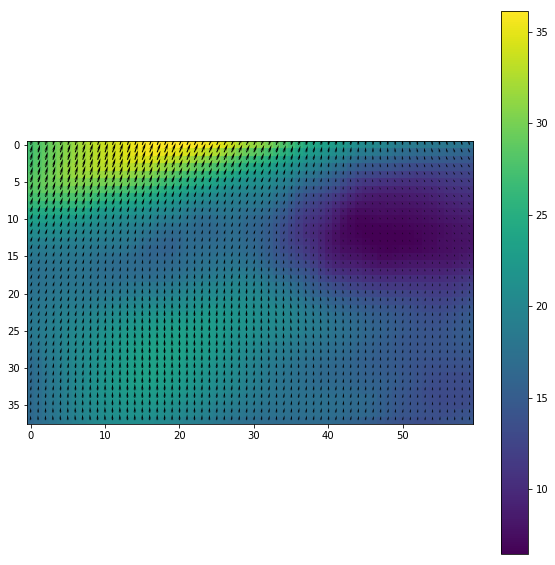

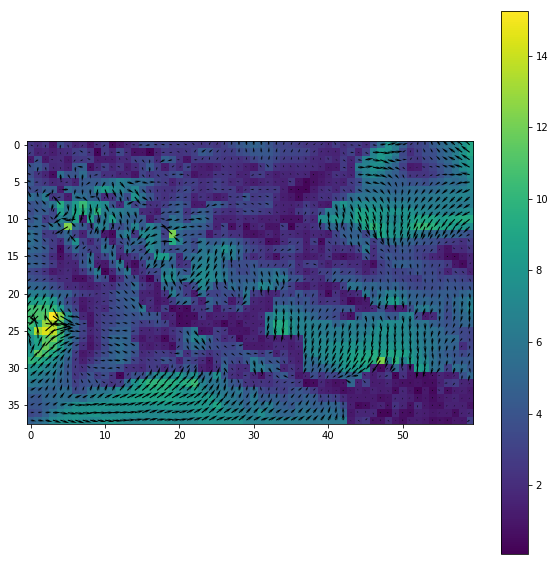

In [33]:
def p7(gfsFile,uname,vname):


    uvar = gfsFile.variables.get(uname) #Reads the variable
    vvar = gfsFile.variables.get(vname) #Reads the variable
    
    lat  = gfsFile.variables['lat_0']
    lon  = gfsFile.variables['lon_0']    
    
    latVals = np.array([x for x in lat])
    lonVals = np.array([x for x in lon])
    
#     print(latVals)
#     print(lonVals)
    minlat = 3
    maxlat = 41
    minlon = 240
    maxlon = 300     
    
    latArray = [True if x > minlat and x < maxlat else False for x in latVals]    
    lonArray = [True if x > minlon and x < maxlon else False for x in lonVals]    

    minIdx = 0
    maxIdx = len(latVals)
    for idx in range(len(latVals)):            
        if latVals[idx] == minlat:
                maxIdx = idx
        if latVals[idx] == maxlat:
                minIdx = idx

    minLonIdx = 0
    maxLonIdx = len(lonVals)
    for lidx in range(len(lonVals)):            
        if lonVals[lidx] == minlon:
                minLonIdx = lidx
        if lonVals[lidx] == maxlon:
                maxLonIdx = lidx
                
#     print(minIdx)
#     print(maxIdx)
#     print(minLonIdx)
#     print(maxLonIdx)
    uvals = np.array(uvar[0][0])
    vvals = np.array(vvar[0][0])
    
#     print(uvals.shape)
    plt.figure(figsize=(10,10))
    uvals = uvals[minIdx:maxIdx,minLonIdx:maxLonIdx]
    vvals = vvals[minIdx:maxIdx,minLonIdx:maxLonIdx]
#     print(uvals)
#     print(uvals.shape)    

    uvals[uvals>1000] = 0
    vvals[vvals>1000] = 0
            
    mag = np.sqrt(uvals**2 + vvals**2)
    # From the filtered data, we make the plot
    plt.imshow(mag[:])
    plt.colorbar()
    
    plt.quiver(uvals,vvals,  color='Black', 
           headlength=7)
    plt.show()      
    

p7(gfsFile,'u_isobar','v_isobar')
p7(gfsFile,'u_abvgrd','v_abvgrd')